In [2]:
import pandas as pd
board_games=pd.read_csv('board_games.csv')

print(board_games.head())

       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

In [3]:
board_games=board_games.dropna(axis=0)
board_games=board_games[board_games['users_rated']!=0]

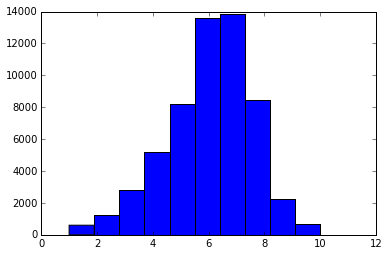

1.57881605958
6.01611284933


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(board_games['average_rating'])
plt.show()
print(np.std(board_games['average_rating']))
print(np.mean(board_games['average_rating']))

The data is continuous so we would use something like MSE or RMSE to get an idea of the error after using a continuous predictor

In [9]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric_columns = board_games[cols]

clus.fit(numeric_columns)

labels=clus.labels_

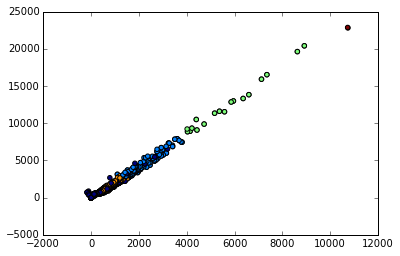

In [10]:
game_mean=numeric_columns.apply(np.mean,axis=1)
game_std=numeric_columns.apply(np.std,axis=1)

plt.scatter(x=game_mean,y=game_std,c=labels)
plt.show()

There are a few games with a lot of players. Games with a similar level of popularity do get assigned to the same cluster.

In [13]:
correlations=numeric_columns.corr()

print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


In [20]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(numeric_columns[cols],numeric_columns['average_rating'])
predictions=reg.predict(numeric_columns[cols])

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(numeric_columns['average_rating'],predictions)
print(mse)

2.09339697583
